Saving network data.csv to network data.csv
    Duration Protocol       SourceIP  DestinationIP  SourcePort  \
0  24.077749      TCP  192.168.1.239  192.168.1.234        8055   
1  97.252384     ICMP  192.168.1.176   192.168.1.82       63174   
2  85.842654      TCP  192.168.1.120  192.168.1.113       30873   
3  79.196991      UDP  192.168.1.212  192.168.1.140        4410   
4  34.928018      TCP   192.168.1.17  192.168.1.223        4702   

   DestinationPort  PacketCount  ByteCount   Label  
0                1          827     198244  Attack  
1              687          673    1202973  Normal  
2              570          319     984671  Attack  
3              683          375      36284  Normal  
4              989          465     817463  Normal  
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.20      0.50      0.29         2

    accuracy                           0.17     

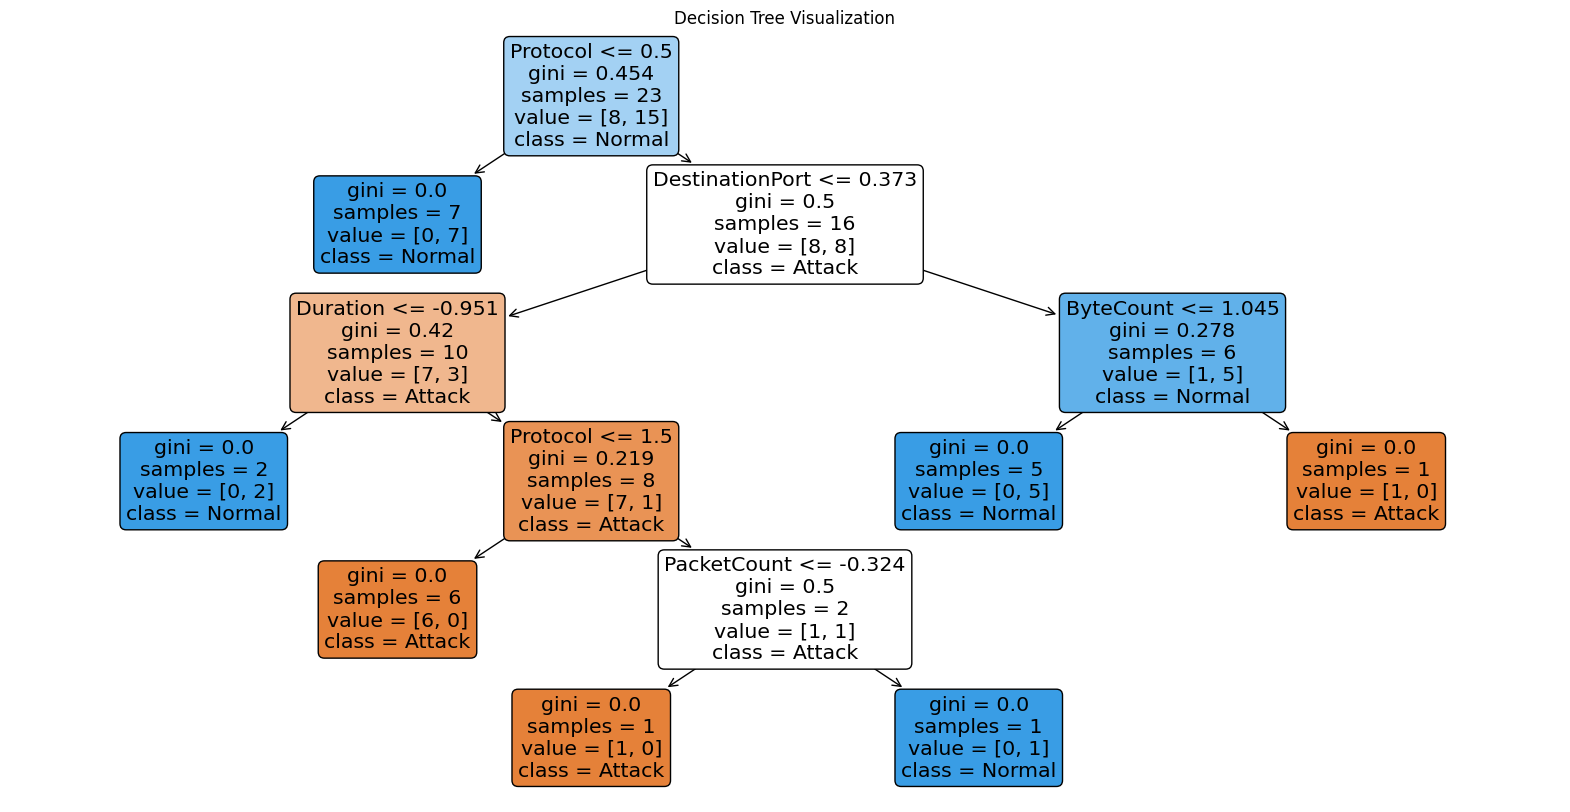

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file from your device
uploaded = files.upload()

# Automatically get the name of the uploaded file
file_name = list(uploaded.keys())[0]

# Load the dataset using the correct file name
data = pd.read_csv(file_name)

# Preview the dataset
print(data.head())

# Preprocessing

# Encode the 'Protocol' column
protocol_enc = LabelEncoder()
data['Protocol'] = protocol_enc.fit_transform(data['Protocol'])

# Drop IP addresses as they may not provide useful information directly
data = data.drop(['SourceIP', 'DestinationIP'], axis=1)

# Encode the target variable 'Label'
label_enc = LabelEncoder()
data['Label'] = label_enc.fit_transform(data['Label'])

# Identify categorical columns to one-hot encode if necessary
# If you have additional categorical columns, include them here
# data = pd.get_dummies(data, columns=['AdditionalCatFeature'])

# Feature Scaling
numerical_features = ['Duration', 'SourcePort', 'DestinationPort', 'PacketCount', 'ByteCount']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the data into training and test sets
X = data.drop('Label', axis=1)  # 'Label' is the target column
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_enc.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
